# Assignment 1: Inspecting the Dataset

In this first assignment, we will get to know the dataset that we will be using throughout. You can find the assignment tasks at the bottom of this document.

Our dataset consists of short texts (article abstracts) from the [PubMed](https://www.ncbi.nlm.nih.gov/pubmed/) database of scientific publications in the Life Science domain. As the full dataset consists of millions of documents, we are using just a small subset, namely all publications that contain the word "recognition" in their title or abstract. You can download that dataset in the form of four files (`recognition_Summaries.pkl.bz2`, etc.) from Canvas. Save these four files in a directory called `data` (do not unpack them, but save them as .bz2 files!), which should be a sub-directory of the one that contains this notebook file.

## Importing some Libraries

In [1]:
from collections import namedtuple, defaultdict, Counter
import pickle, bz2

## Loading the Dataset

In [2]:
Summaries_file = 'data/recognition_Summaries.pkl.bz2'
Summaries = pickle.load( bz2.BZ2File( Summaries_file, 'rb' ) )

To make it easier to access the data, we convert here paper entries into [named tuples](http://docs.python.org/3/library/collections.html#collections.namedtuple). This will allow us to refer to fields by keyword ( like `var.year`), rather than index (like `var[2]`).

In [3]:
paper = namedtuple( 'paper', ['title', 'authors', 'year', 'doi'] )

for (id, paper_info) in Summaries.items():
    Summaries[id] = paper( *paper_info )

In [4]:
Summaries[39432831]

paper(title='Structure and Energetics of PET-Hydrolyzing Enzyme Complexes: A Systematic Comparison from Molecular Dynamics Simulations.', authors=['Berselli A', 'Menziani MC', 'Muniz-Miranda F'], year=2024, doi='10.1021/acs.jcim.4c01369')

In [5]:
Summaries[39432831].title

'Structure and Energetics of PET-Hydrolyzing Enzyme Complexes: A Systematic Comparison from Molecular Dynamics Simulations.'

## Dataset Statistics

The two lines below will install [matplotlib](http://matplotlib.org/) and [NumPy](http://www.numpy.org/), if they are not installed already (if that doesn't work, you might have to download and install them from [here](http://matplotlib.org/downloads.html) and [here](http://sourceforge.net/projects/numpy/files/NumPy/1.10.1/)). We will need these libraries for drawing diagrams and analyzing the data below.

In [6]:
! pip install --user matplotlib
! pip install --user numpy

In [7]:
import matplotlib.pyplot as plt

# show plots inline within the notebook
%matplotlib inline
# set plots' resolution
plt.rcParams['savefig.dpi'] = 100

### Papers per Year

First, we will try to find out how many papers in the dataset were published per year. We are using the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) class for this.

In [8]:
paper_years = [ p.year for p in Summaries.values() ]
papers_per_year = sorted( Counter(paper_years).items() )

print(len(Summaries))
print('Number of papers in the dataset per year for the past decade:')
print(papers_per_year[-10:])

481216
Number of papers in the dataset per year for the past decade:
[(2016, 17385), (2017, 17907), (2018, 18598), (2019, 19328), (2020, 20943), (2021, 23238), (2022, 23894), (2023, 23044), (2024, 22564), (2025, 41)]


Filtering results, to obain only papers since 1940:

In [9]:
papers_per_year_since_1940 = [ (y,count) for (y,count) in papers_per_year if y >= 1940 ]
years_since_1940 = [ y for (y,count) in papers_per_year_since_1940 ]
nr_papers_since_1940 = [ count for (y,count) in papers_per_year_since_1940 ]

print('Number of papers in the dataset published since 1940:')
print(sum(nr_papers_since_1940))

Number of papers in the dataset published since 1940:
481024


Creating a bar plot to visualize the results (using [matplotlib.pyplot.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)):

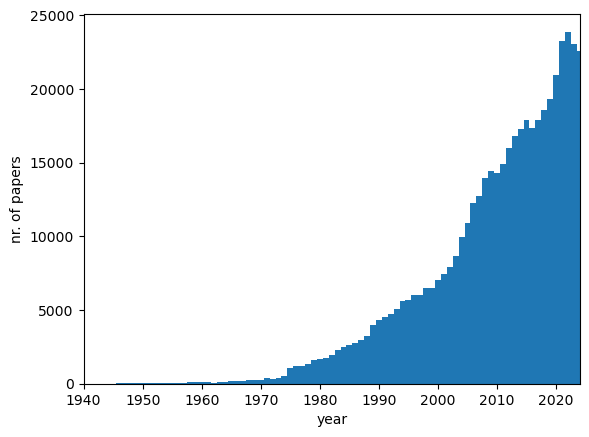

In [10]:
plt.bar(x=years_since_1940, height=nr_papers_since_1940, width=1.0)
plt.xlim(1940, 2024)
plt.xlabel('year')
plt.ylabel('nr. of papers');
plt.show()

Alternatively, we can get the same result by plotting it as a histogram with [matplotlib.pyplot.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist):

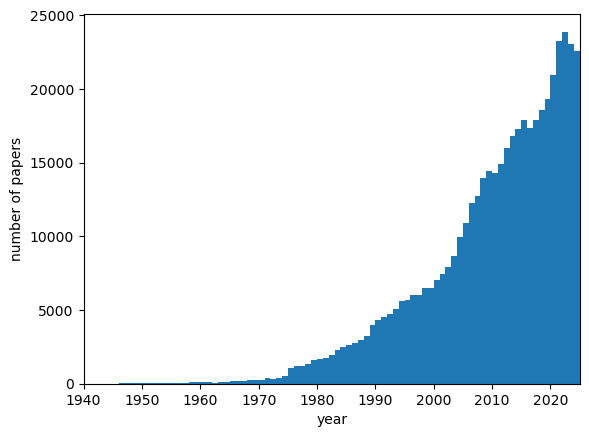

In [11]:
plt.hist( x=[p.year for p in Summaries.values()], bins=range(1940,2026) );
plt.xlim(1940, 2025)
plt.xlabel('year')
plt.ylabel('number of papers');
plt.show()

### Papers per Author

Here, we will obtain the distribution characterizing the number of papers published by an author.

In [12]:
# flattening the list of lists of authors:
flat_author_list = [ auth for paper in Summaries.values() for auth in paper.authors ]

nr_papers_by_author = Counter( flat_author_list )

In [13]:
print('Number of authors in the dataset with distinct names:')
print(len(nr_papers_by_author))

Number of authors in the dataset with distinct names:
868723


In [14]:
print('Top 50 authors with greatest number of papers:')
print(sorted(nr_papers_by_author.items(), key=lambda i:i[1], reverse=True)[:50])

Top 50 authors with greatest number of papers:
[('Wang Y', 4390), ('Zhang Y', 4035), ('Li Y', 3572), ('Liu Y', 3188), ('Wang X', 2962), ('Wang J', 2951), ('Li J', 2795), ('Zhang X', 2655), ('Li X', 2512), ('Zhang J', 2485), ('Wang L', 2332), ('Zhang L', 2146), ('Wang H', 2106), ('Liu J', 1960), ('Liu X', 1949), ('Chen Y', 1947), ('Wang Z', 1926), ('Li H', 1887), ('Zhang H', 1821), ('Chen X', 1722), ('Zhang Z', 1689), ('Wang S', 1636), ('Li Z', 1604), ('Chen J', 1598), ('Yang Y', 1544), ('Li L', 1466), ('Yang J', 1440), ('Liu H', 1418), ('Li S', 1395), ('Zhao Y', 1322), ('Liu Z', 1321), ('Wang C', 1275), ('Li C', 1225), ('Chen L', 1217), ('Zhang W', 1216), ('Wang W', 1206), ('Zhang S', 1191), ('Zhou Y', 1158), ('Wang Q', 1141), ('Wu Y', 1133), ('Xu Y', 1115), ('Liu S', 1113), ('Li W', 1111), ('Li M', 1102), ('Liu L', 1093), ('Chen H', 1082), ('Zhang C', 1080), ('Huang Y', 1060), ('Chen Z', 1051), ('Yang X', 1027)]


Then we can create a histogram to visualize the results:

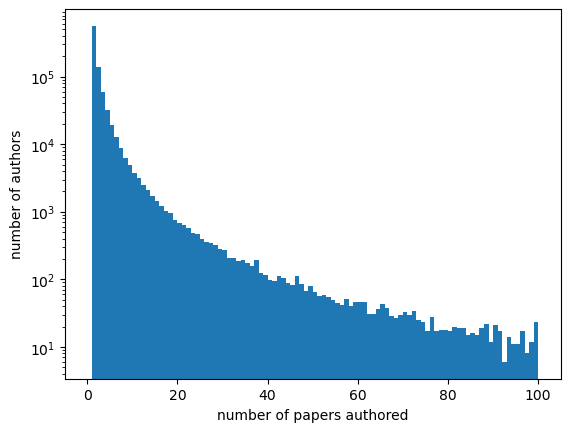

In [15]:
plt.hist( x=list(nr_papers_by_author.values()), bins=range(101), log=True )
plt.xlabel('number of papers authored')
plt.ylabel('number of authors');
plt.show()

### Authors per Paper

Then we can make a similar analysis for the number of authors per paper:

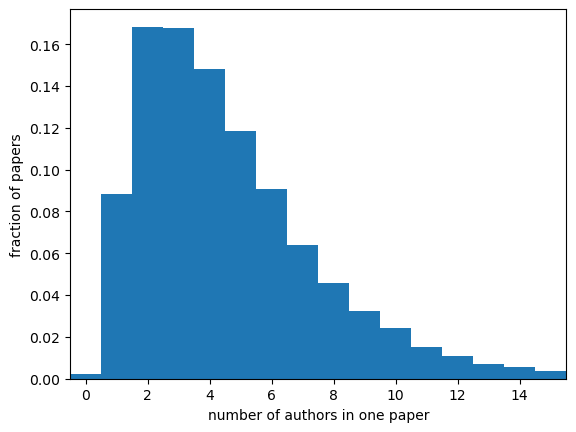

In [16]:
plt.hist(x=[ len(p.authors) for p in Summaries.values() ], bins=range(20), align='left', density=True)
plt.xlabel('number of authors in one paper')
plt.ylabel('fraction of papers')
plt.xlim(-0.5, 15.5);
plt.show()

### Words in Titles

And then we can have a first look into the words we find in titles (applying a very naive word splitting method for now):

In [17]:
words = [ word.lower() for paper in Summaries.values() for word in paper.title.split(' ') ]
word_counts = Counter(words)

print('Number of distinct words in the paper titles:')
print(len(word_counts))

Number of distinct words in the paper titles:
320755


----------

# Tasks

**Your name:** Mohamed Bentaher

### Task 1

Create a Python dictionary object that returns a set of all names of second authors (that is, the authors that appear second in the list of authors) for a given year. Name this dictionary `second_authors_at_year`. (You can use a [*defaultdict*](https://docs.python.org/3/library/collections.html#collections.defaultdict) with a default value of [*set*](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset).) Demonstrate the working of this dictionary by showing the set of second authors for the year 1956.

In [18]:
second_authors_at_year = defaultdict(set)

for paper in Summaries.values():
    if len(paper.authors) >= 2:
        second_author = paper.authors[1]
        year = paper.year
        second_authors_at_year[year].add(second_author) 

print("Second authors in year 1956:", second_authors_at_year[1956])

Second authors in year 1956: {'CONLEY CL', 'HAKE HW', 'IVANOFF JC', 'BUSH WR', 'WEINSTEIN M', "O'LEARY JL", 'VON MIKULICZ-RADECKI F', 'LABERGE DL', 'FRASER R', 'BUCKINGHAM RA', 'GLAS WW', 'ROSENZWEIG MR', 'PLAZAK DJ', 'ROWE A Jr', 'JONES JD', 'FELDMAN H', 'EWING WH', 'WYSO E', 'VERRIEST G', 'BAILEY DE', 'FRAZIER SH', 'STEVENS D', 'VONDRASHEK SC', 'SHANBROM E', 'NORDIN BE', 'BIERMAN HR', "DI SANT'AGNESE PA", 'COSTELLO JO', 'JONA E'}


### Task 2

Based on the dictionary `second_authors_at_year` from exercise 1 above, create a plot for the years from 1956 until now that shows how many authors published at least one paper as second author in the given particular year.

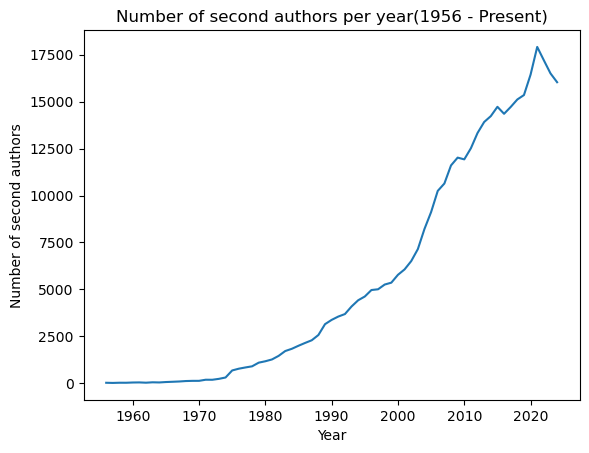

In [19]:
years = list(range(1956,2025))
authors_per_year = [len(second_authors_at_year[year]) for year in years]

plt.plot(years, authors_per_year)
plt.xlabel("Year")
plt.ylabel("Number of second authors")
plt.title("Number of second authors per year(1956 - Present)")
plt.show()

### Task 3

Print out the top 10 most often occurring words in the papers' titles together with their frequency, in descending order with respect to the frequency. Filter out words that are only one, two, three or four characters long, like `a` or `of` or `the` or `from`, to only show words that have five or more characters. Use the data structures created above (in the sections before the tasks).

In [20]:
filtered_words = [word for word in words if len(word) >= 5]
filtered_word_counts = Counter(filtered_words)

for i, (word, count) in enumerate(filtered_word_counts.most_common(10), 1):
    print(f"{i}. {word}: {count}")

1. recognition: 63465
2. using: 20737
3. human: 18931
4. protein: 15135
5. based: 14106
6. analysis: 13413
7. detection: 12532
8. visual: 12431
9. memory: 11524
10. effects: 11184


### Task 4

Calculate and plot (e.g. using [plt.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)) a graph of the frequency of the 200 most frequent words in titles of papers, from most frequent to least frequent, again only counting words of five or more characters. (For readability, don't show the actual words.) Make again use of the data structures created above.

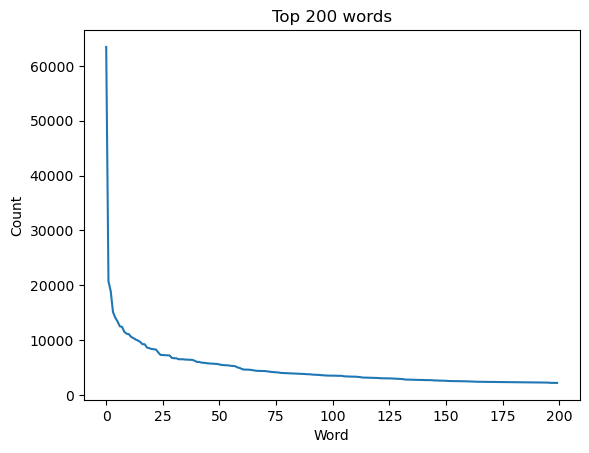

In [21]:
top_200_counts = [count for word, count in filtered_word_counts.most_common(200)]

plt.plot(top_200_counts)
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Top 200 words")
plt.show()

### Task 5

What do you notice when looking at the top 10 most frequent words? Explain all types of words we find in this top-10 and why they show up here.

**Answer:** 

What is noticable about the top 10 most frequent words is that "recognition" appears most frequently (over three times as frequent as the second-most common word). This is because, according to the assignment description, the dataset contains a subset that only includes articles with the term "recognition" in the title or abstract. Other frequent terms like "using," "based," and "analysis" are common in scientific abstracts, because they describe methodologies or approaches. Lastly, there are domain-specific words like "protein," "detection," "visual," "memory," and "effects", which indicate a focus on topics in biology and the recognition of images. So in short, these words show the dataset’s emphasis on studies related to "recognition".

# Submission

Submit the answers to the assignment via Canvas as a modified version of this Notebook file (file with `.ipynb` extension) that includes your code and your answers.

Before submitting, restart the kernel and re-run the complete code (**Kernel > Restart & Run All**), and then check whether your assignment code still works as expected.

Don't forget to add your name, and remember that the assignments have to be done **individually**, and that code sharing or copying are **strictly forbidden** and will be punished.